In [1]:
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical
from devol import DEvol, GenomeHandler
import numpy as np
from keras import backend as K
import matplotlib.pyplot as plt
import scipy

Using TensorFlow backend.


### Prepare dataset
This problem uses mnist, a handwritten digit classification problem used for many introductory deep learning examples. Here, we load the data and prepare it for use by the GPU. We also do a one-hot encoding of the labels.

In [2]:
K.set_image_data_format("channels_last")

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = y_train[:,0]
y_test = y_test[:,0]
print("data shapes")
print("  x train:", x_train.shape)
print("  x test:", x_test.shape)
print("  y train:", y_train.shape)
print("  y test:", y_test.shape)
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
dataset = ((x_train, y_train), (x_test, y_test))

data shapes
  x train: (50000, 32, 32, 3)
  x test: (10000, 32, 32, 3)
  y train: (50000,)
  y test: (10000,)


### Prepare the genome configuration
The `GenomeHandler` class handles the constraints that are imposed upon models in a particular genetic program. In this example, a genome is allowed **up to** 3 convolutional layeres, 2 dense layers, 64 feature maps in each convolution, and 1024 nodes in each dense layer. It also specifies two possible activation functions(relu and sigmoid). See `genome-handler.py` for more information.

In [3]:
max_conv_layers = 5
max_dense_layers = 2 # including final softmax layer
max_conv_kernels = 64
max_dense_nodes = 1024
input_shape = x_train.shape[1:]
num_classes = 10
#activ = ["sigmoid"]  # using sigmoid as activation only
activ = ["relu"]   # using relu as activation only
#activ = None # using both sigmoid and relu

genome_handler = GenomeHandler(max_conv_layers, max_dense_layers, max_conv_kernels, \
                    max_dense_nodes, input_shape, num_classes, \
                    batch_normalization=True, dropout=True, max_pooling=True, \
                optimizers=None, activations=activ)

### Create and run the genetic program
The next, and final, step is create a `DEvol` and run it. Here we specify a few settings pertaining to the genetic program. In this example, we have 10 generations of evolution, 10 members in each population, and 3 epochs of training used to evaluate each model's fitness. The program will save each genome's encoding, as well as the model's loss and accuracy, in a `.csv` file printed at the beginning of program.

In [4]:
num_generations = 20
population_size = 10
num_epochs = 10

devol = DEvol(genome_handler)
model = devol.run(dataset, num_generations, population_size, num_epochs)
model.summary()

Genome encoding and accuracy data stored at Thu Nov  9 23:50:33 2017.csv 


model 1/10 - generation 1/20:

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 39s - loss: 1.6140 - acc: 0.4148 - val_loss: 1.6017 - val_acc: 0.4289
Epoch 2/10
50000/50000 [==============================] - 39s - loss: 1.3184 - acc: 0.5272 - val_loss: 1.8344 - val_acc: 0.3627
Epoch 3/10
50000/50000 [==============================] - 39s - loss: 1.2125 - acc: 0.5673 - val_loss: 1.3706 - val_acc: 0.5176
Epoch 4/10
50000/50000 [==============================] - 38s - loss: 1.1358 - acc: 0.5976 - val_loss: 1.6489 - val_acc: 0.4112
Epoch 5/10
50000/50000 [==============================] - 41s - loss: 1.0755 - acc: 0.6227 - val_loss: 1.2607 - val_acc: 0.5602
Epoch 6/10
50000/50000 [==============================] - 39s - loss: 1.0319 - acc: 0.6360 - val_loss: 1.3438 - val_acc: 0.5111
Epoch 7/10
50000/50000 [==============================] - 39s - loss: 1.002

50000/50000 [==============================] - 15s - loss: 1.0116 - acc: 0.6523 - val_loss: 1.6289 - val_acc: 0.4483
Epoch 00004: early stopping

model 8/10 - generation 2/20:

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 16s - loss: 1.5979 - acc: 0.4316 - val_loss: 1.3369 - val_acc: 0.5238
Epoch 2/10
50000/50000 [==============================] - 16s - loss: 1.1984 - acc: 0.5710 - val_loss: 1.1289 - val_acc: 0.6029
Epoch 3/10
50000/50000 [==============================] - 15s - loss: 1.0488 - acc: 0.6278 - val_loss: 1.2166 - val_acc: 0.5636
Epoch 4/10
50000/50000 [==============================] - 15s - loss: 0.9489 - acc: 0.6639 - val_loss: 0.9432 - val_acc: 0.6781
Epoch 5/10
50000/50000 [==============================] - 15s - loss: 0.8744 - acc: 0.6941 - val_loss: 0.9104 - val_acc: 0.6888
Epoch 6/10
50000/50000 [==============================] - 15s - loss: 0.8174 - acc: 0.7115 - val_loss: 0.8858 - val_acc: 0.7012
Epoch

50000/50000 [==============================] - 19s - loss: 0.8383 - acc: 0.7047 - val_loss: 0.8991 - val_acc: 0.6924
Epoch 8/10
50000/50000 [==============================] - 19s - loss: 0.8028 - acc: 0.7183 - val_loss: 0.9518 - val_acc: 0.6666
Epoch 9/10
50000/50000 [==============================] - 19s - loss: 0.7692 - acc: 0.7313 - val_loss: 0.9349 - val_acc: 0.6754
Epoch 00008: early stopping

model 5/10 - generation 4/20:

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 19s - loss: 1.6356 - acc: 0.4186 - val_loss: 1.3269 - val_acc: 0.5301
Epoch 2/10
50000/50000 [==============================] - 18s - loss: 1.3760 - acc: 0.5149 - val_loss: 1.3449 - val_acc: 0.5131
Epoch 3/10
50000/50000 [==============================] - 18s - loss: 1.2940 - acc: 0.5482 - val_loss: 1.5003 - val_acc: 0.4884
Epoch 00002: early stopping

model 6/10 - generation 4/20:

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 

50000/50000 [==============================] - 24s - loss: 3.0424 - acc: 0.1058 - val_loss: 2.3031 - val_acc: 0.1000
Epoch 2/10
50000/50000 [==============================] - 23s - loss: 2.3035 - acc: 0.1003 - val_loss: 2.3030 - val_acc: 0.1000
Epoch 3/10
50000/50000 [==============================] - 23s - loss: 2.3029 - acc: 0.0992 - val_loss: 2.3028 - val_acc: 0.1000
Epoch 4/10
50000/50000 [==============================] - 23s - loss: 2.3033 - acc: 0.0992 - val_loss: 2.3028 - val_acc: 0.1000
Epoch 5/10
50000/50000 [==============================] - 23s - loss: 2.3030 - acc: 0.0986 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 6/10
50000/50000 [==============================] - 23s - loss: 2.3028 - acc: 0.0992 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 7/10
50000/50000 [==============================] - 23s - loss: 2.3028 - acc: 0.0969 - val_loss: 2.3032 - val_acc: 0.1000
Epoch 8/10
50000/50000 [==============================] - 23s - loss: 2.3028 - acc: 0.0987 - val_loss: 2.3026 - val

50000/50000 [==============================] - 14s - loss: 1.4176 - acc: 0.4900 - val_loss: 1.4317 - val_acc: 0.4812
Epoch 3/10
50000/50000 [==============================] - 14s - loss: 1.3202 - acc: 0.5298 - val_loss: 1.3055 - val_acc: 0.5395
Epoch 4/10
50000/50000 [==============================] - 14s - loss: 1.2419 - acc: 0.5585 - val_loss: 1.2295 - val_acc: 0.5621
Epoch 5/10
50000/50000 [==============================] - 14s - loss: 1.1919 - acc: 0.5771 - val_loss: 1.2244 - val_acc: 0.5715
Epoch 6/10
50000/50000 [==============================] - 14s - loss: 1.1510 - acc: 0.5915 - val_loss: 1.1778 - val_acc: 0.5872
Epoch 7/10
50000/50000 [==============================] - 14s - loss: 1.1234 - acc: 0.6039 - val_loss: 1.1695 - val_acc: 0.5886
Epoch 8/10
50000/50000 [==============================] - 14s - loss: 1.0982 - acc: 0.6117 - val_loss: 1.1829 - val_acc: 0.5813
Epoch 9/10
50000/50000 [==============================] - 14s - loss: 1.0806 - acc: 0.6196 - val_loss: 1.1583 - val

50000/50000 [==============================] - 18s - loss: 1.6300 - acc: 0.4245 - val_loss: 1.3512 - val_acc: 0.5204
Epoch 2/10
50000/50000 [==============================] - 17s - loss: 1.2756 - acc: 0.5494 - val_loss: 1.2468 - val_acc: 0.5566
Epoch 3/10
50000/50000 [==============================] - 17s - loss: 1.1483 - acc: 0.5990 - val_loss: 1.1865 - val_acc: 0.5895
Epoch 4/10
50000/50000 [==============================] - 16s - loss: 1.0716 - acc: 0.6275 - val_loss: 1.1079 - val_acc: 0.6155
Epoch 5/10
50000/50000 [==============================] - 17s - loss: 1.0122 - acc: 0.6482 - val_loss: 1.1556 - val_acc: 0.5998
Epoch 6/10
50000/50000 [==============================] - 16s - loss: 0.9735 - acc: 0.6621 - val_loss: 1.0768 - val_acc: 0.6292
Epoch 7/10
50000/50000 [==============================] - 17s - loss: 0.9346 - acc: 0.6763 - val_loss: 1.2006 - val_acc: 0.5997
Epoch 8/10
50000/50000 [==============================] - 16s - loss: 0.9046 - acc: 0.6845 - val_loss: 1.0713 - val

50000/50000 [==============================] - 15s - loss: 0.9947 - acc: 0.6524 - val_loss: 1.1206 - val_acc: 0.6119
Epoch 6/10
50000/50000 [==============================] - 15s - loss: 0.9459 - acc: 0.6720 - val_loss: 1.1270 - val_acc: 0.6129
Epoch 7/10
50000/50000 [==============================] - 15s - loss: 0.8975 - acc: 0.6860 - val_loss: 1.1576 - val_acc: 0.6091
Epoch 00006: early stopping
Generation 8:		best accuracy: 0.6591		average: 0.6172		std: 0.0295

model 1/10 - generation 9/20:

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 19s - loss: 1.6490 - acc: 0.4160 - val_loss: 1.3883 - val_acc: 0.5120
Epoch 2/10
50000/50000 [==============================] - 17s - loss: 1.2615 - acc: 0.5552 - val_loss: 1.1953 - val_acc: 0.5838
Epoch 3/10
50000/50000 [==============================] - 17s - loss: 1.1034 - acc: 0.6152 - val_loss: 1.1515 - val_acc: 0.5995
Epoch 4/10
50000/50000 [==============================] - 17s - lo

50000/50000 [==============================] - 17s - loss: 1.0339 - acc: 0.6377 - val_loss: 1.1572 - val_acc: 0.5972
Epoch 6/10
50000/50000 [==============================] - 17s - loss: 0.9796 - acc: 0.6576 - val_loss: 1.1095 - val_acc: 0.6153
Epoch 7/10
50000/50000 [==============================] - 17s - loss: 0.9351 - acc: 0.6750 - val_loss: 1.0869 - val_acc: 0.6277
Epoch 8/10
50000/50000 [==============================] - 17s - loss: 0.8935 - acc: 0.6884 - val_loss: 1.0777 - val_acc: 0.6301
Epoch 9/10
50000/50000 [==============================] - 17s - loss: 0.8616 - acc: 0.6991 - val_loss: 1.0648 - val_acc: 0.6380
Epoch 10/10
50000/50000 [==============================] - 17s - loss: 0.8245 - acc: 0.7120 - val_loss: 1.0751 - val_acc: 0.6369

model 4/10 - generation 10/20:

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 19s - loss: 1.8088 - acc: 0.3416 - val_loss: 1.5232 - val_acc: 0.4592
Epoch 2/10
50000/50000 [=======

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 19s - loss: 1.6585 - acc: 0.4063 - val_loss: 1.3974 - val_acc: 0.4966
Epoch 2/10
50000/50000 [==============================] - 17s - loss: 1.3415 - acc: 0.5264 - val_loss: 1.3087 - val_acc: 0.5346
Epoch 3/10
50000/50000 [==============================] - 17s - loss: 1.2136 - acc: 0.5730 - val_loss: 1.2008 - val_acc: 0.5721
Epoch 4/10
50000/50000 [==============================] - 17s - loss: 1.1236 - acc: 0.6043 - val_loss: 1.1740 - val_acc: 0.5883
Epoch 5/10
50000/50000 [==============================] - 17s - loss: 1.0633 - acc: 0.6286 - val_loss: 1.1281 - val_acc: 0.6011
Epoch 6/10
50000/50000 [==============================] - 17s - loss: 1.0136 - acc: 0.6454 - val_loss: 1.1775 - val_acc: 0.5908
Epoch 7/10
50000/50000 [==============================] - 17s - loss: 0.9769 - acc: 0.6587 - val_loss: 1.1026 - val_acc: 0.6117
Epoch 8/10
50000/50000 [==============================

50000/50000 [==============================] - 17s - loss: 0.9320 - acc: 0.6759 - val_loss: 1.1088 - val_acc: 0.6207
Epoch 7/10
50000/50000 [==============================] - 17s - loss: 0.8873 - acc: 0.6939 - val_loss: 1.1123 - val_acc: 0.6145
Epoch 8/10
50000/50000 [==============================] - 18s - loss: 0.8475 - acc: 0.7063 - val_loss: 1.1155 - val_acc: 0.6210
Epoch 00007: early stopping

model 9/10 - generation 12/20:

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 18s - loss: 1.6764 - acc: 0.4009 - val_loss: 1.5457 - val_acc: 0.4422
Epoch 2/10
50000/50000 [==============================] - 15s - loss: 1.3897 - acc: 0.5047 - val_loss: 1.4160 - val_acc: 0.5113
Epoch 3/10
50000/50000 [==============================] - 15s - loss: 1.2620 - acc: 0.5553 - val_loss: 1.3350 - val_acc: 0.5326
Epoch 4/10
50000/50000 [==============================] - 15s - loss: 1.1666 - acc: 0.5926 - val_loss: 1.1837 - val_acc: 0.5968
Epoc

50000/50000 [==============================] - 18s - loss: 1.6554 - acc: 0.4115 - val_loss: 1.4312 - val_acc: 0.5098
Epoch 2/10
50000/50000 [==============================] - 15s - loss: 1.3046 - acc: 0.5402 - val_loss: 1.2687 - val_acc: 0.5615
Epoch 3/10
50000/50000 [==============================] - 15s - loss: 1.1528 - acc: 0.5954 - val_loss: 1.2058 - val_acc: 0.5958
Epoch 4/10
50000/50000 [==============================] - 15s - loss: 1.0593 - acc: 0.6313 - val_loss: 1.1135 - val_acc: 0.6146
Epoch 5/10
50000/50000 [==============================] - 15s - loss: 1.0109 - acc: 0.6483 - val_loss: 1.0326 - val_acc: 0.6477
Epoch 6/10
50000/50000 [==============================] - 15s - loss: 0.9793 - acc: 0.6606 - val_loss: 1.0786 - val_acc: 0.6385
Epoch 7/10
50000/50000 [==============================] - 15s - loss: 0.9621 - acc: 0.6658 - val_loss: 1.0684 - val_acc: 0.6343
Epoch 00006: early stopping

model 2/10 - generation 14/20:

Train on 50000 samples, validate on 10000 samples
Epoc

50000/50000 [==============================] - 18s - loss: 0.9719 - acc: 0.6624 - val_loss: 1.1424 - val_acc: 0.6028
Epoch 6/10
50000/50000 [==============================] - 18s - loss: 0.9142 - acc: 0.6833 - val_loss: 1.1521 - val_acc: 0.6084
Epoch 7/10
50000/50000 [==============================] - 18s - loss: 0.8624 - acc: 0.6981 - val_loss: 1.1255 - val_acc: 0.6188
Epoch 8/10
50000/50000 [==============================] - 18s - loss: 0.8148 - acc: 0.7179 - val_loss: 1.1566 - val_acc: 0.6106
Epoch 9/10
50000/50000 [==============================] - 18s - loss: 0.7793 - acc: 0.7278 - val_loss: 1.1537 - val_acc: 0.6147
Epoch 00008: early stopping

model 5/10 - generation 15/20:

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 21s - loss: 3.9654 - acc: 0.3644 - val_loss: 1.4596 - val_acc: 0.4809
Epoch 2/10
50000/50000 [==============================] - 19s - loss: 1.3009 - acc: 0.5404 - val_loss: 1.3163 - val_acc: 0.5313
Epoc

50000/50000 [==============================] - 22s - loss: 1.4880 - acc: 0.4704 - val_loss: 1.2822 - val_acc: 0.5484
Epoch 2/10
50000/50000 [==============================] - 18s - loss: 1.1614 - acc: 0.5934 - val_loss: 1.1934 - val_acc: 0.5847
Epoch 3/10
50000/50000 [==============================] - 18s - loss: 1.0496 - acc: 0.6364 - val_loss: 1.1111 - val_acc: 0.6151
Epoch 4/10
50000/50000 [==============================] - 18s - loss: 0.9729 - acc: 0.6645 - val_loss: 1.0981 - val_acc: 0.6171
Epoch 5/10
50000/50000 [==============================] - 18s - loss: 0.9245 - acc: 0.6816 - val_loss: 1.1731 - val_acc: 0.5931
Epoch 6/10
50000/50000 [==============================] - 18s - loss: 0.8789 - acc: 0.6976 - val_loss: 1.0585 - val_acc: 0.6367
Epoch 7/10
50000/50000 [==============================] - 18s - loss: 0.8417 - acc: 0.7115 - val_loss: 1.0225 - val_acc: 0.6492
Epoch 8/10
50000/50000 [==============================] - 18s - loss: 0.8138 - acc: 0.7209 - val_loss: 1.0777 - val

50000/50000 [==============================] - 19s - loss: 1.1793 - acc: 0.5857 - val_loss: 1.1853 - val_acc: 0.5816
Epoch 4/10
50000/50000 [==============================] - 19s - loss: 1.0962 - acc: 0.6157 - val_loss: 1.1501 - val_acc: 0.5946
Epoch 5/10
50000/50000 [==============================] - 19s - loss: 1.0393 - acc: 0.6363 - val_loss: 1.1256 - val_acc: 0.6038
Epoch 6/10
50000/50000 [==============================] - 19s - loss: 0.9918 - acc: 0.6528 - val_loss: 1.0932 - val_acc: 0.6129
Epoch 7/10
50000/50000 [==============================] - 19s - loss: 0.9562 - acc: 0.6658 - val_loss: 1.0944 - val_acc: 0.6181
Epoch 8/10
50000/50000 [==============================] - 19s - loss: 0.9256 - acc: 0.6779 - val_loss: 1.1477 - val_acc: 0.5947
Epoch 00007: early stopping
Generation 17:		best accuracy: 0.6697		average: 0.6246		std: 0.0422

model 1/10 - generation 18/20:

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 20s - 

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 19s - loss: 1.5832 - acc: 0.4352 - val_loss: 1.3754 - val_acc: 0.4969
Epoch 2/10
50000/50000 [==============================] - 15s - loss: 1.2297 - acc: 0.5667 - val_loss: 1.2195 - val_acc: 0.5698
Epoch 3/10
50000/50000 [==============================] - 15s - loss: 1.1101 - acc: 0.6121 - val_loss: 1.6606 - val_acc: 0.4733
Epoch 4/10
50000/50000 [==============================] - 15s - loss: 1.0410 - acc: 0.6372 - val_loss: 1.1748 - val_acc: 0.5996
Epoch 5/10
50000/50000 [==============================] - 15s - loss: 0.9897 - acc: 0.6539 - val_loss: 1.0499 - val_acc: 0.6324
Epoch 6/10
50000/50000 [==============================] - 15s - loss: 0.9586 - acc: 0.6706 - val_loss: 1.1649 - val_acc: 0.5968
Epoch 7/10
50000/50000 [==============================] - 15s - loss: 0.9271 - acc: 0.6785 - val_loss: 0.9808 - val_acc: 0.6681
Epoch 8/10
50000/50000 [==============================

50000/50000 [==============================] - 18s - loss: 0.7914 - acc: 0.7258 - val_loss: 0.9625 - val_acc: 0.6708
Epoch 10/10
50000/50000 [==============================] - 18s - loss: 0.7627 - acc: 0.7365 - val_loss: 0.9564 - val_acc: 0.6693

model 6/10 - generation 20/20:

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 22s - loss: 1.6735 - acc: 0.4091 - val_loss: 1.5372 - val_acc: 0.4372
Epoch 2/10
50000/50000 [==============================] - 18s - loss: 1.3058 - acc: 0.5368 - val_loss: 1.3021 - val_acc: 0.5341
Epoch 3/10
50000/50000 [==============================] - 18s - loss: 1.1770 - acc: 0.5837 - val_loss: 2.2405 - val_acc: 0.3538
Epoch 4/10
50000/50000 [==============================] - 18s - loss: 1.0990 - acc: 0.6137 - val_loss: 1.0626 - val_acc: 0.6232
Epoch 5/10
50000/50000 [==============================] - 18s - loss: 1.0508 - acc: 0.6333 - val_loss: 1.0990 - val_acc: 0.6168
Epoch 6/10
50000/50000 [=======

## Analysis of evolutional CNN on MNIST(batchnorm=False, dropout=False)
max_conv_layers = 3

max_dense_layers = 2 # including final softmax layer

max_conv_kernels = 64

max_dense_nodes = 1024

num_generations = 10

population_size = 10

num_epochs = 3

In [4]:
# View experiment result based on index
experiment = 5

In [5]:
#batch=true, dropout=true, activ=[relu, sigmoid]
if experiment == 1:
    datafile = "Sun Oct 29 15:41:54 2017.csv"
    genome_handler = GenomeHandler(max_conv_layers, max_dense_layers, max_conv_kernels, \
                    max_dense_nodes, input_shape, num_classes, \
                    batch_normalization=True, dropout=True, max_pooling=True, \
                optimizers=None, activations=None)
    
#batch=false, dropout=false, activ=[relu,sigmoid]
elif experiment == 2:
    datafile = "Sat Oct 28 20:48:00 2017.csv"
    genome_handler = GenomeHandler(max_conv_layers, max_dense_layers, max_conv_kernels, \
                    max_dense_nodes, input_shape, num_classes, \
                    batch_normalization=False, dropout=False, max_pooling=True, \
                optimizers=None, activations=None)
    
#batch=false, dropout=false, activ=[sigmoid]
elif experiment == 3:
    datafile = "Sun Oct 29 18:06:26 2017.csv" 
    genome_handler = GenomeHandler(max_conv_layers, max_dense_layers, max_conv_kernels, \
                    max_dense_nodes, input_shape, num_classes, \
                    batch_normalization=False, dropout=False, max_pooling=True, \
                optimizers=None, activations=["sigmoid"])

#batch=false, dropout=false, activ=[relu]    
elif experiment == 4:
    datafile = "Sun Oct 29 20:00:59 2017.csv"
    genome_handler = GenomeHandler(max_conv_layers, max_dense_layers, max_conv_kernels, \
                    max_dense_nodes, input_shape, num_classes, \
                    batch_normalization=False, dropout=False, max_pooling=True, \
                optimizers=None, activations=["relu"])

elif experiment == 5:
    datafile = "Thu Nov  9 23:50:33 2017.csv"
    genome_handler = GenomeHandler(max_conv_layers, max_dense_layers, max_conv_kernels, \
                    max_dense_nodes, input_shape, num_classes, \
                    batch_normalization=True, dropout=True, max_pooling=True, \
                optimizers=None, activations=activ)

# Using current setting    
else:
    datafile = devol.datafile

data = np.genfromtxt(datafile, delimiter=",")
num_generations = 10   # Default
population_size = 10   # Default
data = data[1:]
#print(data.shape)
accuracy = []
for row in data:
    accuracy.append(row[-1])
running_max = scipy.maximum.accumulate(accuracy)
accuracy = np.array(accuracy)


In [6]:
best_model = genome_handler.decode_best(datafile)
best_model.summary()
print("accuracy: {}%".format(max(accuracy)*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 8)         4616      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 8)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 32, 8)         0         
__________

### Running max of accuracy across generations

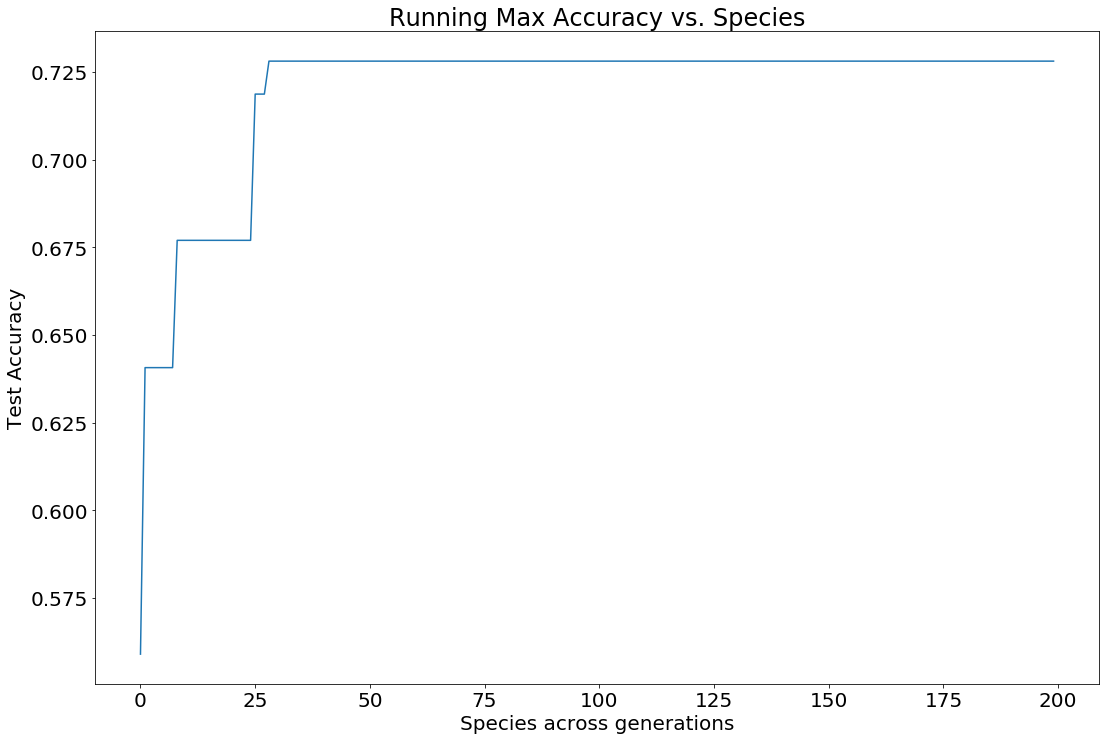

In [7]:
plt.figure(1)
plt.plot(range(len(running_max)), running_max)
plt.title('Running Max Accuracy vs. Species', fontsize=24)
plt.xlabel('Species across generations',fontsize=20)
plt.ylabel('Test Accuracy',fontsize=20)
plt.tick_params(labelsize=20)

fig = plt.gcf()
fig.set_size_inches(18, 12)
plt.savefig('plot/runningmax_'+ str(experiment) +'.png')
plt.show()

### Accuracy scattered across generations

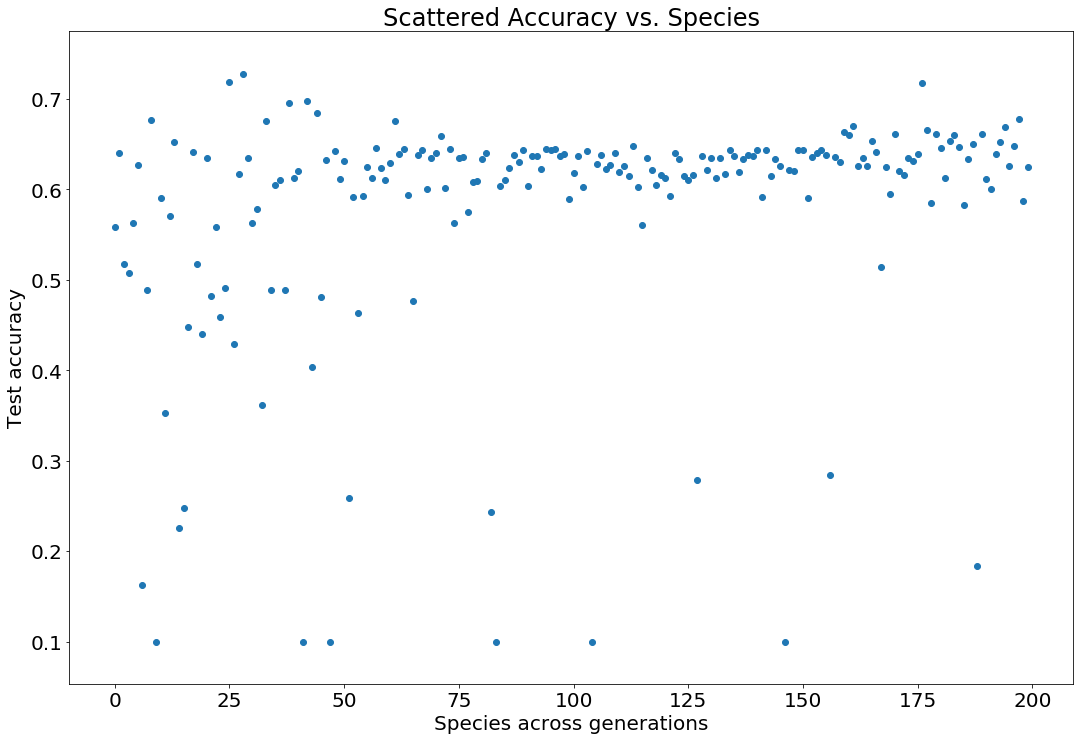

In [8]:
plt.figure(2)
plt.scatter(range(len(accuracy)), accuracy)
plt.title('Scattered Accuracy vs. Species', fontsize=24)
plt.xlabel('Species across generations',fontsize=20)
plt.ylabel('Test accuracy',fontsize=20)
plt.tick_params(labelsize=20)

fig = plt.gcf()
fig.set_size_inches(18, 12)
plt.savefig('plot/accuracy_' + str(experiment) +'.png')
plt.show()

### Mean and standard deviation of accuracies per generation 

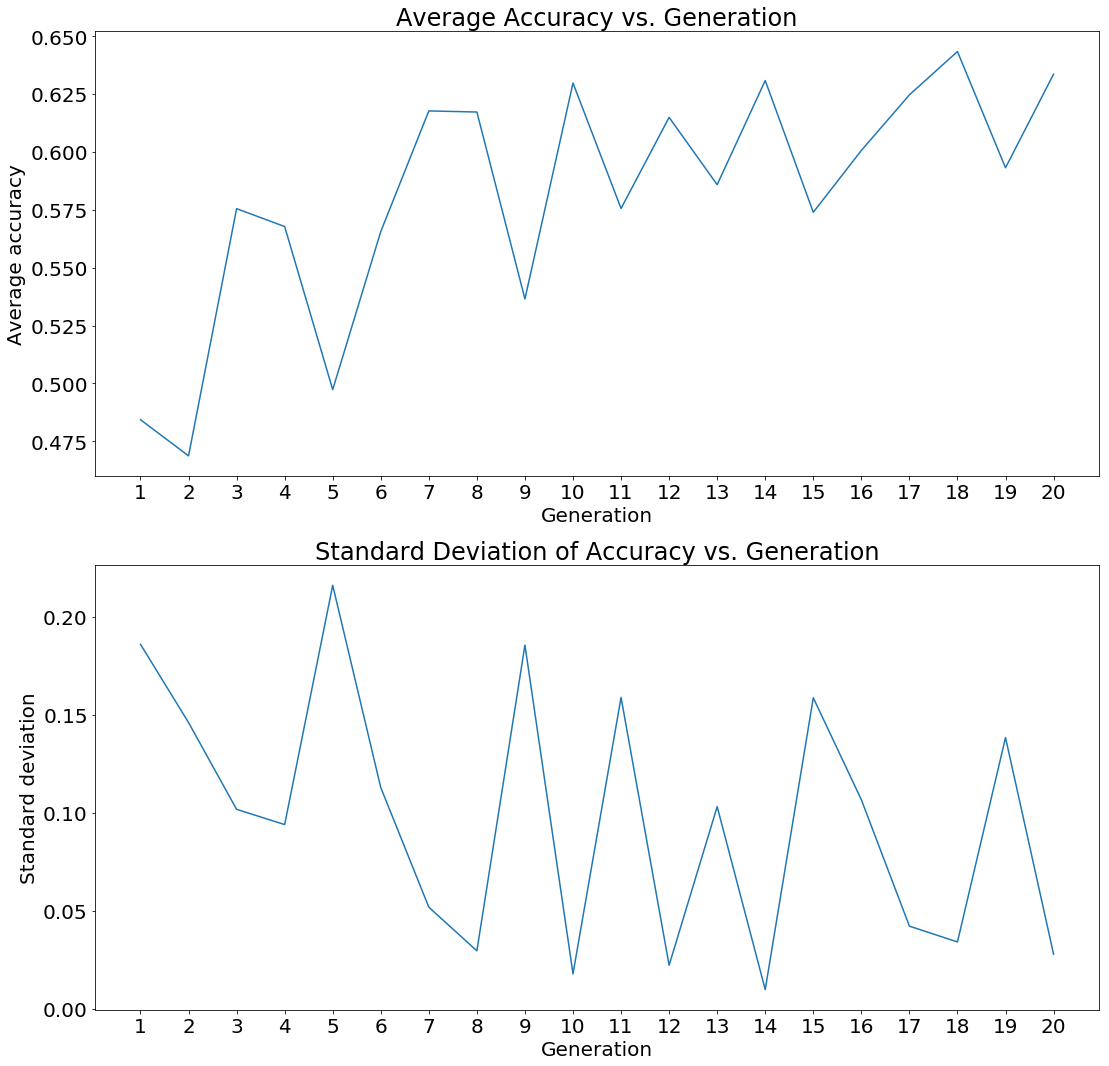

In [10]:
num_generations = 20
population_size = 10
num_epochs = 10
accuracy_per_gen = np.split(accuracy, num_generations)
average_per_gen = []
std_dev_per_gen = []
for item in accuracy_per_gen:
    average = np.mean(item)
    std_dev = np.std(item)
    average_per_gen.append(average)
    std_dev_per_gen.append(std_dev)

plt.figure(3)
plt.subplot(2, 1, 1)
plt.plot(range(1,num_generations+1), average_per_gen)
plt.title('Average Accuracy vs. Generation', fontsize=24)
plt.xlabel('Generation',fontsize=20)
plt.ylabel('Average accuracy',fontsize=20)
plt.tick_params(labelsize=20)
plt.xticks(np.arange(1, num_generations+1, 1))


plt.subplot(2, 1, 2)
plt.plot(range(1,num_generations+1), std_dev_per_gen)
plt.title('Standard Deviation of Accuracy vs. Generation', fontsize=24)
plt.xlabel('Generation',fontsize=20)
plt.ylabel('Standard deviation',fontsize=20)
plt.tick_params(labelsize=20)
plt.xticks(np.arange(1, num_generations+1, 1))


fig = plt.gcf()
fig.set_size_inches(18, 18)
plt.savefig('plot/mean_std_' + str(experiment) +'.png')
plt.show()
#print(average_per_gen)

### Accuracy scattered based on network structures across generations
Note that a network has at least 1 convolutional layer and 1 dense layer

In [ ]:
# Sort the accuracy data points based on the network structure
conv3den2=[]   # Network with 3(maximum) convolutional layers and 2(maximum) dense layers
conv3den1=[]   # Network with 3(maximum) convolutional layers and 1 dense layers
conv2den2=[]   # Network with 2 convolutional layers and 2(maximum) dense layers
conv2den1=[]   # Network with 2 convolutional layers and 1 dense layers
conv1den2=[]   # Network with 1 convolutional layers and 1 dense layers
conv1den1=[]   # Network with 1 convolutional layers and 1 dense layers

gen = 1
pop = 0
for row in data:
    pop += 1
    if pop > population_size:
        gen += 1
        pop = 1
    if row[0] + row[6] + row[12] == 3:
        if row[18] == 1:
            conv3den2.append((gen,row[-1]))
        else:
            conv3den1.append((gen,row[-1]))
    elif row[0] + row[6] + row[12] == 2:
        if row[18] == 1:
            conv2den2.append((gen,row[-1]))
        else:
            conv2den1.append((gen,row[-1]))
    else:
        if row[18] == 1:
            conv1den2.append((gen,row[-1]))
        else:
            conv1den1.append((gen,row[-1]))
print(len(conv3den2))
print(len(conv3den1))
print(len(conv2den2))
print(len(conv2den1))
print(len(conv1den2))
print(len(conv1den1))


In [ ]:
plt.figure(4)

colors = ['b', 'g', 'r', 'c', 'm', 'y']
x1,y1 = zip(*conv3den2)
x2,y2 = zip(*conv3den1)
x3,y3 = zip(*conv2den2)
x4,y4 = zip(*conv2den1)
x5,y5 = zip(*conv1den2)
x6,y6 = zip(*conv1den1)



f, (ax, ax2) = plt.subplots(2, 1, sharex=True)
ax.scatter(x1,y1,color=colors[0])
ax.scatter(x2,y2,color=colors[1])
ax.scatter(x3,y3,color=colors[2])
ax.scatter(x4,y4,color=colors[3])
ax.scatter(x5,y5,color=colors[4])
ax.scatter(x6,y6,color=colors[5])

conv3_den2 = ax2.scatter(x1,y1,color=colors[0])
conv3_den1 = ax2.scatter(x2,y2,color=colors[1])
conv2_den2 = ax2.scatter(x3,y3,color=colors[2])
conv2_den1 = ax2.scatter(x4,y4,color=colors[3])
conv1_den2 = ax2.scatter(x5,y5,color=colors[4])
conv1_den1 = ax2.scatter(x6,y6,color=colors[5])

ax.set_ylim(.94, 1.)  # outliers only
ax2.set_ylim(0.09, .12)  # most of the data

ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop='off')  # don't put tick labels at the top
ax2.xaxis.tick_bottom()
f.subplots_adjust(hspace=0.15)

ax2.legend((conv3_den2, conv3_den1, conv2_den2, conv2_den1, conv1_den2, conv1_den1),
           ('conv3_den2', 'conv3_den1', 'conv2_den2', 'conv2_den1', 'conv1_den2', 'conv1_den1'),
           scatterpoints=1,
           loc='lower right',
           ncol=1,
           fontsize=24)

ax.set_title('Scattered Accuracy based on Network Structure vs. Generation', fontsize=24)
ax2.set_xlabel('Generation',fontsize=20)
ax.set_ylabel('Test accuracy',fontsize=20)
ax2.set_ylabel('Test accuracy',fontsize=20)

ax.tick_params(labelsize=20)
ax2.tick_params(labelsize=20)

ax2.xaxis.set_ticks(np.arange(1, num_generations+1, 1))

fig = plt.gcf()
fig.set_size_inches(18, 20)
plt.savefig('plot/accuracy_structure_' + str(experiment) +'.png')
plt.show()

In [ ]:
plt.figure(5)

conv3den2_avg = np.mean(y1)
conv3den2_std = np.std(y1)
conv3den1_avg = np.mean(y2)
conv3den1_std = np.std(y2)
conv2den2_avg = np.mean(y3)
conv2den2_std = np.std(y3)
conv2den1_avg = np.mean(y4)
conv2den1_std = np.std(y4)
conv1den2_avg = np.mean(y5)
conv1den2_std = np.std(y5)
conv1den1_avg = np.mean(y6)
conv1den1_std = np.std(y6)

plt.scatter(conv3den2_std,conv3den2_avg,color=colors[0])
plt.scatter(conv3den1_std,conv3den1_avg,color=colors[1])
plt.scatter(conv2den2_std,conv2den2_avg,color=colors[2])
plt.scatter(conv2den1_std,conv2den1_avg,color=colors[3])
plt.scatter(conv1den2_std,conv1den2_avg,color=colors[4])
plt.scatter(conv1den1_std,conv1den1_avg,color=colors[5])

plt.legend(('conv3_den2', 'conv3_den1', 'conv2_den2', 'conv2_den1', 'conv1_den2', 'conv1_den1'),
           scatterpoints=1,
           loc='lower left',
           ncol=1,
           fontsize=24)

plt.tick_params(labelsize=20)

fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.savefig('plot/mean_std_structure_' + str(experiment) +'.png')
plt.show()
